In [49]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)

mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)


#The Row dimention is "None". That is number data to train MNISt in one batch
#Since we are not sure of the number of data, by putting 'None', tensorflow is going to figure it out for us
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [50]:
#2 Layers of hidden layers

#layer 1
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob)

#layer 2
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob)

#output
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = model, labels = Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

Epoch: 0001 Avg. cost = 0.428
Epoch: 0002 Avg. cost = 0.167
Epoch: 0003 Avg. cost = 0.117
Epoch: 0004 Avg. cost = 0.088
Epoch: 0005 Avg. cost = 0.071
Epoch: 0006 Avg. cost = 0.061
Epoch: 0007 Avg. cost = 0.054
Epoch: 0008 Avg. cost = 0.046
Epoch: 0009 Avg. cost = 0.044
Epoch: 0010 Avg. cost = 0.037
Epoch: 0011 Avg. cost = 0.034
Epoch: 0012 Avg. cost = 0.032
Epoch: 0013 Avg. cost = 0.029
Epoch: 0014 Avg. cost = 0.028
Epoch: 0015 Avg. cost = 0.023
optimization complete
test accuracy: 0.9817


NameError: name 'labels' is not defined

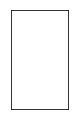

In [51]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    batch_size = 100
    total_batch = int(mnist.train.num_examples /  batch_size)
    train_test_x, train_test_y = mnist.train.next_batch(10000)

    for epoch in range(15):
        total_cost = 0
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.8})
            total_cost += cost_val
            
        print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.3f}'.format(total_cost/total_batch))
        
    print('optimization complete')
        
    is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    print('test accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))
        #print('train accuracy:', sess.run(accuracy, feed_dict={X: train_test_x, Y: train_test_y}))
            
    lables = sess.run(model, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1})
    
    fig = plt.figure()
    
    for i in range(10):
        subplot = fig.add_subplot(2, 5, i+1)
        
        subplot.set_xticks([])
        subplot.set_yticks([])
        
        subplot.set_title('%d' % np.argmax(labels[i]))
        
        subplot.imshow(mnist.test.images[i].reshape((28, 28)), cmap.plt.cm.gray_r)
        
        plt.show()

## Ways to prevent overfitting
1. Dropout
    - Keep the balace between weight by preventing the concentration of certian feature into certian neuron.  In order to do that we disable certian neuron in each epock randomly
    
    `tf.nn.dropout(x,  keep_prob,  noise_shape=None,  seed=None,  name=None)`
      #### Args:
        * x: A floating point tensor.
        * keep_prob: A scalar Tensor with the same type as x. The probability that each element is kept.
        * noise_shape: A 1-D Tensor of type int32, representing the shape for randomly generated keep/drop flags.
        * seed: A Python integer. Used to create random seeds. See tf.set_random_seed for behavior.
        * name: A name for this operation (optional).
        
2. Batch Normalization
    - it not only prevents overfitting but also increases performance.
    `tf.nn.batch_normalization(x, mean, variance, offset, scale, variance_epsilon, name=None)`
    
     #### Args:
        * x: Input Tensor of arbitrary dimensionality.
        * mean: A mean Tensor.
        * variance: A variance Tensor.
        * offset: An offset Tensor, often denoted  in equations, or None. If present, will be added to the normalized tensor.
        * scale: A scale Tensor, often denoted  in equations, or None. If present, the scale is applied to the normalized tensor.
        * variance_epsilon: A small float number to avoid dividing by 0.
        * name: A name for this operation (optional).